In [1]:
# For training
from keras.applications import VGG16
from keras import models, optimizers, layers
# Testing plugin
from livelossplot import PlotLossesKeras
# For image loading
from keras.preprocessing.image import img_to_array
from skimage import io
import numpy as np
from tqdm import tqdm_notebook

/home/sagacius/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
height = 350
width = 350
batch_size = 50

In [3]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(height, width, 3))
vgg_conv.trainable = True
set_trainable = False
for layer in vgg_conv.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
#vgg_conv.summary()

In [4]:
model = models.Sequential()

model.add(vgg_conv)

#model.add(layers.Flatten())
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(163, activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='relu'))

#model.summary()

In [5]:
x_train = np.load("Cache/LPD/new/x_train.npy")
y_train = np.load("Cache/LPD/new/y_train.npy")
x_test = np.load("Cache/LPD/new/x_test.npy")
y_test = np.load("Cache/LPD/new/y_test.npy")
x_validation = np.load("Cache/LPD/new/x_validation.npy")
y_validation = np.load("Cache/LPD/new/y_validation.npy")

In [6]:
im_train = []
im_validation = []
for path in tqdm_notebook(x_train):
    im = io.imread(path.split("../")[1])
    #im = img_to_array(im)
    im_train.append(im)
for path in tqdm_notebook(x_validation):
    im = io.imread(path.split("../")[1])
    #im = img_to_array(im)
    im_validation.append(im)

In [7]:
im_train = np.asarray(im_train, dtype="float") / 255.0
im_validation = np.asarray(im_validation, dtype="float") / 255.0
print("[INFO] data matrix: {:.2f}MB".format(im_train.nbytes / (1024 * 1000.0)))
print("[INFO] data matrix: {:.2f}MB".format(im_validation.nbytes / (1024 * 1000.0)))

[INFO] data matrix: 9043.95MB
[INFO] data matrix: 1291.99MB


In [8]:
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True),
              metrics=['acc'])

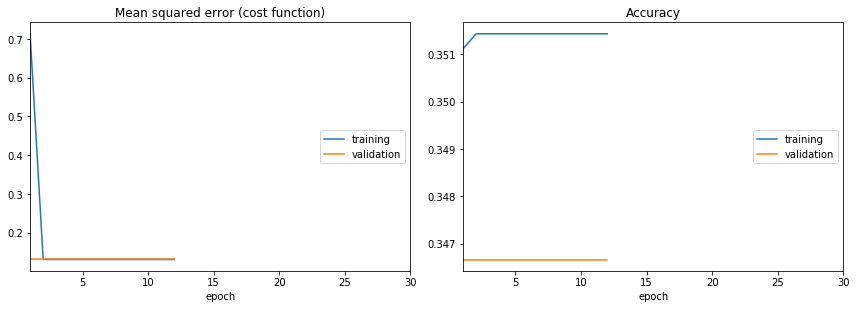

Epoch 13/30
3060/3150 [============================>.] - ETA: 1s - loss: 0.1313 - acc: 0.3549

KeyboardInterrupt: 

In [9]:
history = model.fit(
    im_train,
    y_train,
    batch_size=20,
    epochs=30,
    validation_data=(im_validation, y_validation),
    callbacks=[PlotLossesKeras()],
    verbose=1
)

In [7]:
model.save('Models/LD_mark1.h5')

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [9]:
import numpy as np
nacc = np.asarray(acc)
nval_acc = np.asarray(val_acc)
nloss = np.asarray(loss)
nval_loss = np.asarray(val_loss)
logs_mark = np.row_stack((nacc, nval_acc, nloss, nval_loss))

In [10]:
np.save("Logs/CD_mark1.npy", logs_mark)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

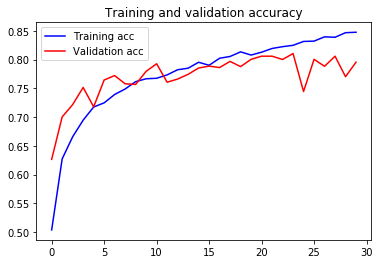

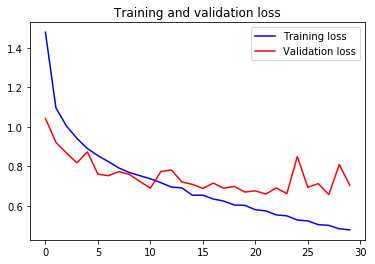

In [14]:
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [20]:
testing_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(height, width),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = testing_generator.filenames
 
# Get the ground truth from generator
ground_truth = testing_generator.classes
 
# Get the label to class mapping from the generator
label2index = testing_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(testing_generator, 
                                      steps=testing_generator.samples/testing_generator.batch_size,
                                      verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),testing_generator.samples))
print(str(len(errors)/testing_generator.samples) + "%")

Found 1823 images belonging to 10 classes.
365/364 [==============================] - 13s 36ms/step
No of errors = 374/1823
0.20515633571036754%
